# defining functions with parameters

In [8]:
import pandas as pd
import gc
import torch
from datasets import Dataset
from mirage import factcc, trueTeacher, feqa, factacc, qags

def load_dataset(dataset_path):
    df = pd.read_csv(dataset_path)
    return Dataset.from_pandas(df)

def clear_gpu_memory():
    gc.collect()
    torch.cuda.empty_cache()
    for device_id in range(torch.cuda.device_count()):
        torch.cuda.set_device(device_id)
        torch.cuda.empty_cache()

def evaluate_factcc(dataset, dataset_name, source_col, gen_col, save_folder):
    clear_gpu_memory()
    
    metric = factcc()
    metric.create_pipeline(device="cuda:0")
    
    map_kwargs = {"batched": True, "batch_size": 10}
    
    return metric.evaluate_dataset(
        dataset,
        source_col=source_col,
        gen_col=gen_col,
        truncation=True,
        save_result_dataset_folder_path=save_folder,
        map_kwargs=map_kwargs
    )

def evaluate_feqa(dataset, dataset_name, source_col, gen_col, save_folder):
    clear_gpu_memory()
    
    metric = feqa()
    metric.create_pipeline(device="cuda:0")
    
    map_kwargs = {"batched": True, "batch_size": 10}
    
    return metric.evaluate_dataset(
        dataset,
        source_col=source_col,
        gen_col=gen_col,
        keep_questions=True,
        keep_answers=True,
        qg_pipeline_call_args={"truncation":True, "max_length":512},
        save_result_dataset_folder_path=save_folder,
        map_kwargs=map_kwargs
    )

def evaluate_qags(dataset, dataset_name, source_col, gen_col, save_folder):
    clear_gpu_memory()
    
    metric = qags()
    metric.create_pipeline(device="cuda:0")
    
    map_kwargs = {"batched": True, "batch_size": 10}
    
    return metric.evaluate_dataset(
        dataset,
        source_col=source_col,
        gen_col=gen_col,
        keep_questions=True,
        keep_answers=True,
        qg_pipeline_call_args={"truncation":True, "max_length":512},
        save_result_dataset_folder_path=save_folder,
        map_kwargs=map_kwargs
    )

def evaluate_factacc(dataset, dataset_name, source_col, gen_col, save_folder):
    clear_gpu_memory()
    
    metric = factacc()
    metric.create_pipeline(device="cuda:0")

    #batched produces errors for dialfact
    map_kwargs = {"batched": False, "batch_size": 10}
    
    return metric.evaluate_dataset(
        dataset,
        source_col=source_col,
        gen_col=gen_col,
        truncation=True,
        save_result_dataset_folder_path=save_folder,
        map_kwargs=map_kwargs
    )


/home/benjamin/work/test/testing_mirage/MIRAGE/mirage_test3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
metric_functions = {
    "QAGS": evaluate_qags,
    "FactCC": evaluate_factcc,
    "FEQA": evaluate_feqa,
    "FactAcc": evaluate_factacc,
}

# True Datasets

In [14]:
true_dataset_folder = "true/"
dataset_dict = {
    "begin": true_dataset_folder + "begin_dev_download.csv",
    "dialfact": true_dataset_folder + "dialfact_valid_download.csv",
    "fever": true_dataset_folder + "fever_dev_download.csv",
    "mnbm": true_dataset_folder + "mnbm_download.csv",
    "q2": true_dataset_folder + "q2_download.csv",
    "qags_cnndm": true_dataset_folder + "qags_cnndm_download.csv",
    #"qags_xsum": true_dataset_folder + "qags_xsum_download.csv",
    "summeval": true_dataset_folder + "summeval_download.csv", 
    "vitc": true_dataset_folder + "vitc_dev_download.csv"
}

# Results

In [13]:
for dataset_name, dataset_path in dataset_dict.items():
    print(dataset_name)
    data = load_dataset(dataset_path)

    display(data.to_pandas())

begin


,Unnamed: 0,grounding,previous turn,generated_text,gold label,coarse label,full label set,label
0,0,early skiers used one long pole or spear.,i imagine it makes travel on snow much easier!...,"it is a long pole, or spear",entailment,entailment,not-generic;on-topic;uncooperative;faithful,1
1,1,"every country aims to provide basic education,...",yes before age 12. they have lasted from at le...,most countries aim to provide basic education.,entailment,entailment,not-generic;on-topic;cooperative;faithful,1
2,2,although modern skiing has evolved from beginn...,is it scary?,"yeah, it can be scary",generic,neutral,generic;on-topic;cooperative;hallucination-per...,0
3,3,although modern skiing has evolved from beginn...,is it scary?,"it has evolved from beginnings in scandinavia,...",entailment,entailment,not-generic;on-topic;uncooperative;faithful,1
4,4,popping of the kernels was achieved by hand on...,do you know how many flavours there are?,we know about a few varieties,generic,neutral,generic;on-topic;cooperative;hallucination-per...,0
...,...,...,...,...,...,...,...,...
831,831,"religious debates over the ""harry potter"" seri...",i do like some fantasy novels myself. i've nev...,j.k.rowling wrote the novels in the 1800s he a...,entailment,entailment,not-generic;on-topic;cooperative;faithful,1
832,832,almost as soon as automobiles had been invente...,that's so cool. i guess that's just our compet...,it is almost as soon as automobiles had been i...,entailment,entailment,not-generic;on-topic;uncooperative;faithful,1
833,833,"the twin albums ""use your illusion i"" and ""use...","wow, now that is impressive, what albums were ...","i think i'll have to check out the bbc album ""...",hallucination,neutral,not-generic;on-topic;cooperative;hallucination...,0
834,834,"skiing can be a means of transport, a recreati...",wow! skiing has been around that long? i guess...,"oh yeah! it's a means of transport, a recreati...",entailment,entailment,not-generic;on-topic;cooperative;faithful,1


dialfact


,Unnamed: 0,grounding,generated_text,label
0,0,Physical attractiveness is the degree to which...,"Yes, it has, but what i think is just vanity t...",1
1,1,Physical attractiveness is the degree to which...,"Yes, it has, but anything you think is just va...",1
2,2,Physical attractiveness is the degree to which...,"Yes, it has, but one I think is just vanity to...",1
3,3,This has led to an interrelation of human fitn...,"Yes, it has, but some I think is just vanity t...",1
4,4,Evidence suggests that cognitive behavioral th...,It has been suggested that cognitive behaviora...,1
...,...,...,...,...
8684,8684,Red is the colour at the end of the visible sp...,Red is at the beginning of the visible spectru...,0
8685,8685,Red is the colour at the end of the visible sp...,Most people who love the color red are seen to...,0
8686,8686,The series will conclude with its eighth seaso...,"I have heard so much about Game of Thrones, I ...",1
8687,8687,The series will conclude with its eighth seaso...,The series will conclude with its eighth seaso...,0


fever


,Unnamed: 0,id,grounding,generated_text,label
0,0,91198,Colin Kaepernick . Kaepernick began his profes...,Colin Kaepernick became a starting quarterback...,0
1,1,194462,Katherine Matilda `` Tilda '' Swinton ( born 5...,Tilda Swinton is a vegan.,0
2,2,137334,Soul Food is a 1997 American comedy-drama film...,Fox 2000 Pictures released the film Soul Food.,1
3,3,166626,"Anne Rice . Born in New Orleans , Rice spent m...",Anne Rice was born in New Jersey.,0
4,4,111897,Telemundo ( [ teleˈmundo ] ) is an American Sp...,Telemundo is a English-language television net...,0
...,...,...,...,...,...
18204,18204,17554,Amy Jade Winehouse ( 14 September 1983 -- 23 J...,Amy Winehouse died on 23 July 2011.,1
18205,18205,26217,Java . Formed mostly as the result of volcanic...,Java was formed by volcanic eruptions.,1
18206,18206,145641,Michael Hutchence . On the morning of 22 Novem...,Michael Hutchence died on a boat.,0
18207,18207,87517,"The Cyclades ( [ ˈsɪklədiːz ] Κυκλάδες , [ ci...",The Cyclades are located to the southeast of G...,1


mnbm


,Unnamed: 0,bbcid,model,grounding,generated_text,label
0,0,34687720,BERTS2S,France's Dubuisson carded a 67 to tie with ove...,rory mcilroy will take a one-shot lead into th...,0
1,1,21267591,BERTS2S,Sheikh Ali Salman told the BBC that for nation...,the leader of bahrain\'s main opposition party...,1
2,2,29347895,BERTS2S,He died at his home in Cambridge following an ...,veteran classical music conductor christopher ...,0
3,3,37618111,BERTS2S,"In the year to the end of March, 57 victims of...",the number of homicides recorded by police in ...,0
4,4,37895159,BERTS2S,The Cherries went down 2-1 at Sunderland on Sa...,bournemouth manager eddie howe says his side a...,0
...,...,...,...,...,...,...
2495,2495,33721182,TranS2S,The Briton finished more than two minutes ahea...,paralympic champion sarah storey won her secon...,0
2496,2496,39017131,TranS2S,The victim was fatally injured outside a prope...,a 23-year-old man has died after a shooting ou...,0
2497,2497,40634994,TranS2S,Marcy Smith was woken up by her son David to f...,an 11-year-old boy has died in a house fire in...,0
2498,2498,35082344,TranS2S,The venture's backers include Tesla Motors and...,one of the world\'s biggest physicists has war...,0


q2


,Unnamed: 0,model,grounding,generated_text,label
0,0,dodeca,In the gradual process of families improving t...,yes they are very well behaved . they are also...,0
1,1,memnet,In the gradual process of families improving t...,"i ' m not sure , but they ' ve been around for...",0
2,2,dodeca,Ross went from being a public-television perso...,he became famous on youtube in the 20th century .,0
3,3,memnet,Ross went from being a public-television perso...,he became popular in the 1980 ' s and 1980s .,1
4,4,dodeca,Stamp collecting proved to be an almost perfec...,stamp collecting was proven to be a perfect ho...,0
...,...,...,...,...,...
1083,1083,memnet,Dance is a performing art form consisting of p...,dance is a performing art form that involves s...,1
1084,1084,dodeca,Dance can be categorized and described by its ...,there are categories for it ' s choreography a...,1
1085,1085,memnet,Dance can be categorized and described by its ...,dance is categorized by its choreography and r...,1
1086,1086,dodeca,"Subsequently, in the new millennium, the popul...","yes , it is mostly sampling . it has also incr...",0


qags_cnndm


,Unnamed: 0,grounding,generated_text,label
0,0,Vitamin and mineral supplements are becoming m...,` the typical western diet is heavily processe...,1
1,1,England will send an under 20 team to the toul...,Aidy boothroyd will be the man in charge of th...,1
2,2,A southern iowa chiropractor accused of accept...,A chiropractor in iowa has surrendered his lic...,0
3,3,You'd have thought the celebrations would've s...,The new england patriots beat seattle seahawks...,0
4,4,"Surkhet, nepal ( cnn ) ten years ago, with her...",Nominations are open for cnn heroes 2015. Doyn...,0
...,...,...,...,...
230,230,( cnn ) did former new england patriot aaron h...,Aaron hernandez has pleaded not guilty to murd...,0
231,231,( cnn ) call it a little piece of heaven for a...,`` july 13th 2014 was the absolute worst day o...,0
232,232,Kim sears looks set to be a glowing bride afte...,Kim sears will marry her long-term partner lat...,0
233,233,David beckham's 40th birthday celebrations nex...,"David beckham's 40th birthday is on saturday, ...",0


summeval


,Unnamed: 0,id,grounding,generated_text,label
0,0,8764fb95bfad8ee849274873a92fb8d6b400eee2,Paul Merson has restarted his row with Andros ...,paul merson was brought on with only seven min...,0
1,1,8764fb95bfad8ee849274873a92fb8d6b400eee2,Paul Merson has restarted his row with Andros ...,paul merson has restarted his row with andros ...,1
2,2,8764fb95bfad8ee849274873a92fb8d6b400eee2,Paul Merson has restarted his row with Andros ...,paul merson has restarted his row with andros ...,1
3,3,8764fb95bfad8ee849274873a92fb8d6b400eee2,Paul Merson has restarted his row with Andros ...,paul merson has restarted his row with andros ...,1
4,4,8764fb95bfad8ee849274873a92fb8d6b400eee2,Paul Merson has restarted his row with Andros ...,paul merson has restarted his row with andros ...,1
...,...,...,...,...,...
1595,1595,e880fda4c25289f8325574246f0f8ed4ff5eb26b,A timewarp home which has remained unchanged s...,a timewarp home which has remained unchanged s...,1
1596,1596,e880fda4c25289f8325574246f0f8ed4ff5eb26b,A timewarp home which has remained unchanged s...,"The collector 's paradise in Horfield , Bristo...",1
1597,1597,e880fda4c25289f8325574246f0f8ed4ff5eb26b,A timewarp home which has remained unchanged s...,"the collector’s paradise in horfield , bristol...",1
1598,1598,e880fda4c25289f8325574246f0f8ed4ff5eb26b,A timewarp home which has remained unchanged s...,"the collector 's paradise in horfield , bristo...",1


vitc


,Unnamed: 0,id,grounding,generated_text,label
0,0,5ea2d97bc9e77c0009cda36d_1,Among the more than 512 guests and musical per...,Dragon Con had less than 1000 guests .,0
1,1,5ea2d97bc9e77c0009cda36d_2,Among the more than 6000 guests and musical pe...,Dragon Con had less than 1000 guests .,0
2,2,5ea2d97bc9e77c0009cda36d_3,Among the more than 512 guests and musical per...,Dragon Con had over 5000 guests .,0
3,3,5ea2d97bc9e77c0009cda36d_4,Among the more than 6000 guests and musical pe...,Dragon Con had over 5000 guests .,1
4,4,5ee3932bc9e77c0008cca539_1,"As of , more than cases of COVID-19 have been ...",COVID-19 has reached less than 185 countries .,0
...,...,...,...,...,...
63049,63049,5ed50881c9e77c000848ebc2_4,X-Men : Apocalypse is a 2016 American superher...,X-Men : Apocalypse is a video game .,0
63050,63050,5ed50880c9e77c000848d8ad_1,Yandex is a Russian book about specialized Int...,Yandex is only a book .,1
63051,63051,5ed50880c9e77c000848d8ad_2,Yandex -LRB- -LSB- ` yʌndɛks -RSB- Яндекс -RRB...,Yandex is only a book .,0
63052,63052,5ed50880c9e77c000848d8ad_3,Yandex -LRB- -LSB- ` yʌndɛks -RSB- Яндекс -RRB...,Yandex is a multinational technology company .,1


In [7]:
from tqdm.notebook import tqdm
import os

In [8]:
for metric_name, metric in metric_functions.items():
    for dataset_name, dataset_path in dataset_dict.items():
        print("Processing Metric " + metric_name + " on dataset " + dataset_name )
        save_folder = "results/true/" + dataset_name +"/" + metric_name + "/"
        if os.path.exists(save_folder):
            print("Already done")
            continue
        data = load_dataset(dataset_path).select(range(10))
        
        metric(data, dataset_name, "grounding", "generated_text", save_folder)

Processing Metric QAGS on dataset begin
Already done
Processing Metric QAGS on dataset dialfact
Already done
Processing Metric QAGS on dataset fever
Already done
Processing Metric QAGS on dataset mnbm
Already done
Processing Metric QAGS on dataset q2
Already done
Processing Metric QAGS on dataset qags_cnndm
Already done
Processing Metric QAGS on dataset summeval
Already done
Processing Metric QAGS on dataset vitc
Already done
Processing Metric FactCC on dataset begin
Already done
Processing Metric FactCC on dataset dialfact
Already done
Processing Metric FactCC on dataset fever
Already done
Processing Metric FactCC on dataset mnbm
Already done
Processing Metric FactCC on dataset q2
Already done
Processing Metric FactCC on dataset qags_cnndm
Already done
Processing Metric FactCC on dataset summeval
Already done
Processing Metric FactCC on dataset vitc
Already done
Processing Metric FEQA on dataset begin
Already done
Processing Metric FEQA on dataset dialfact
Already done
Processing Metr

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Device set to use cuda:0
Device set to use cuda:0
Saving the dataset (1/1 shards): 100%|██████████| 1/1 [00:00<00:00, 597.99 examples/s]


Dataset saved in Hugging Face format at results/true/qags_cnndm/FEQA/
Processing Metric FEQA on dataset summeval


Device set to use cuda:0
Device set to use cuda:0
Saving the dataset (1/1 shards): 100%|██████████| 1/1 [00:00<00:00, 518.52 examples/s]


Dataset saved in Hugging Face format at results/true/summeval/FEQA/
Processing Metric FEQA on dataset vitc


Device set to use cuda:0
Device set to use cuda:0
Saving the dataset (1/1 shards): 100%|██████████| 1/1 [00:00<00:00, 454.08 examples/s]


Dataset saved in Hugging Face format at results/true/vitc/FEQA/
Processing Metric FactAcc on dataset begin
Already done
Processing Metric FactAcc on dataset dialfact


Device set to use cuda:0
Saving the dataset (1/1 shards): 100%|██████████| 1/1 [00:00<00:00, 796.03 examples/s]


Dataset saved in Hugging Face format at results/true/dialfact/FactAcc/
Processing Metric FactAcc on dataset fever


Device set to use cuda:0
Saving the dataset (1/1 shards): 100%|██████████| 1/1 [00:00<00:00, 748.31 examples/s]


Dataset saved in Hugging Face format at results/true/fever/FactAcc/
Processing Metric FactAcc on dataset mnbm


Device set to use cuda:0
Saving the dataset (1/1 shards): 100%|██████████| 1/1 [00:00<00:00, 751.53 examples/s]


Dataset saved in Hugging Face format at results/true/mnbm/FactAcc/
Processing Metric FactAcc on dataset q2


Device set to use cuda:0
Saving the dataset (1/1 shards): 100%|██████████| 1/1 [00:00<00:00, 758.60 examples/s]


Dataset saved in Hugging Face format at results/true/q2/FactAcc/
Processing Metric FactAcc on dataset qags_cnndm


Device set to use cuda:0
Saving the dataset (1/1 shards): 100%|██████████| 1/1 [00:00<00:00, 827.44 examples/s]


Dataset saved in Hugging Face format at results/true/qags_cnndm/FactAcc/
Processing Metric FactAcc on dataset summeval


Device set to use cuda:0
Saving the dataset (1/1 shards): 100%|██████████| 1/1 [00:00<00:00, 643.69 examples/s]


Dataset saved in Hugging Face format at results/true/summeval/FactAcc/
Processing Metric FactAcc on dataset vitc


Device set to use cuda:0
Saving the dataset (1/1 shards): 100%|██████████| 1/1 [00:00<00:00, 636.08 examples/s]

Dataset saved in Hugging Face format at results/true/vitc/FactAcc/


In [9]:
from datasets import load_from_disk
from mirage import ScoreManager

dataset = load_from_disk("results/true/summeval/FactCC")

#This dataset has logic inverted to our library
dataset = dataset.map(lambda row: {"predictions":{"HALL": row["score"], "NOHALL": 1-row["score"]}})
dataset = dataset.map(lambda row: {"label":{"NOHALL" if row["label"] else "HALL"}})

In [10]:
metric_list = [
    "data_stats", "f1", "precision", "recall", "accuracy",
    "balanced_accuracy", "mcc", "kappa", "log_loss",
    "auroc", "auprc", "roc_values", "confusion_matrix", "precision_recall_values"
]
metric_list_without_values = [
    "data_stats", "f1", "precision", "recall", "accuracy",
    "balanced_accuracy", "mcc", "kappa", "log_loss",
    "auroc", "auprc", "confusion_matrix"
]

score_manager = ScoreManager(dataset, metric_list=metric_list_without_values)


# View metrics
display(score_manager.results)

{'data_stats': {'total_samples': 10,
  'pos_count': 2,
  'neg_count': 8,
  'pos_ratio': 0.2,
  'neg_ratio': 0.8,
  'mean_score': 0.3107131054843194,
  'std_score': 0.4518110589145423},
 'f1': 0.72,
 'precision': 0.7523809523809524,
 'recall': 0.7,
 'accuracy': 0.7,
 'balanced_accuracy': 0.625,
 'mcc': 0.2182178902359924,
 'kappa': 0.21052631578947367,
 'log_loss': 2.92711953289326,
 'auroc': 0.4375,
 'auprc': 0.20277777777777778,
 'confusion_matrix': array([[1, 1],
        [2, 6]])}

Plot saved: results/plots/score_distribution.pdf


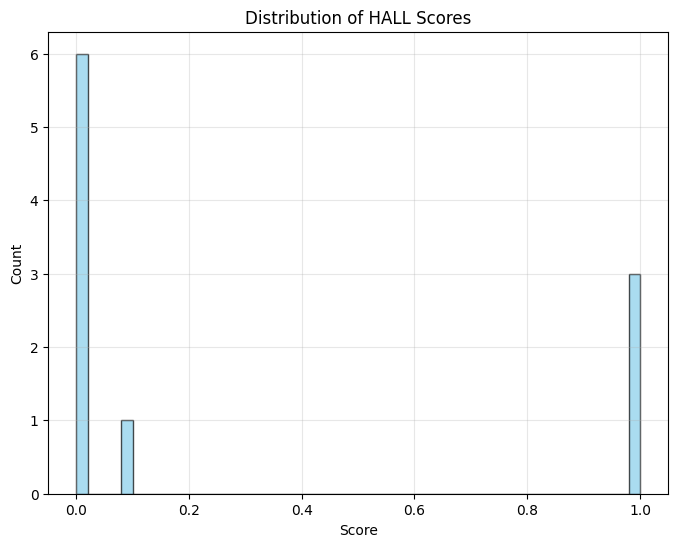

Plot saved: results/plots/metrics_bar.pdf


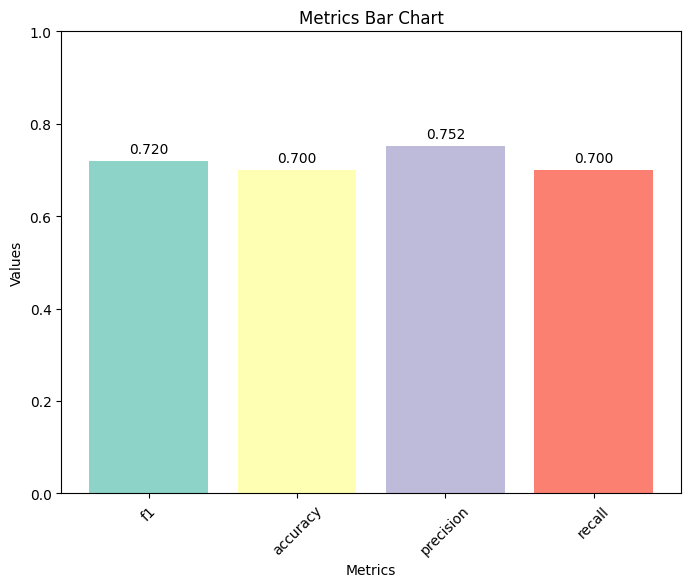

Plot saved: results/plots/roc_curve.pdf


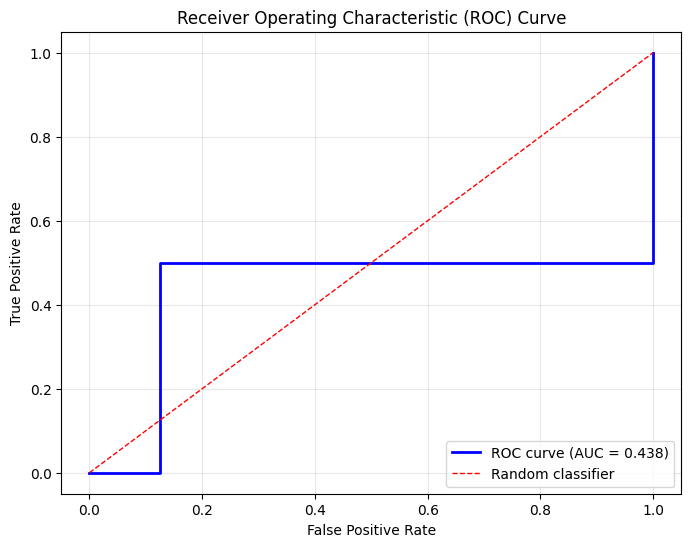

Plot saved: results/plots/precision_recall_curve.pdf


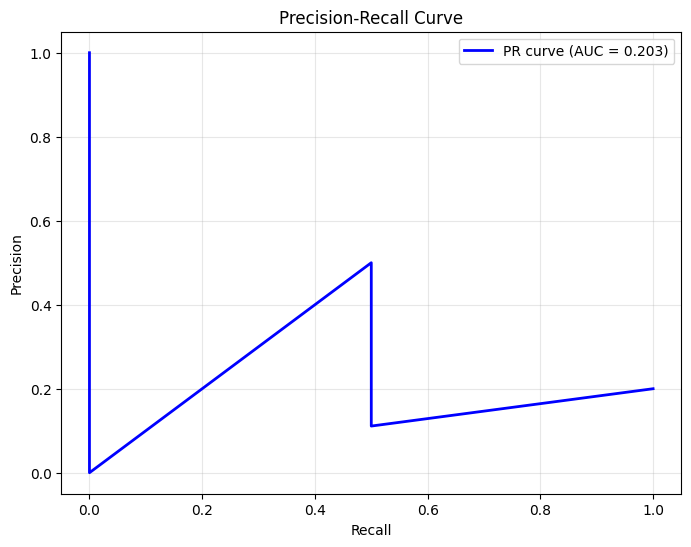

Plot saved: results/plots/confusion_matrix.pdf


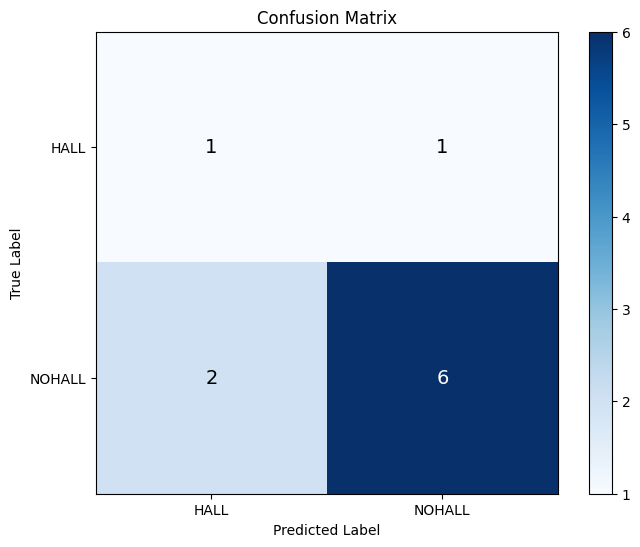

In [11]:
# Plot key metrics
score_manager.plot(
    plot_list=["score_distribution", "metrics_bar", "roc_curve", "precision_recall_curve", "confusion_matrix"],
    metrics_bar=["f1", "accuracy", "precision", "recall"],
    save_plots=True,
    save_format='pdf',
    output_path="results/plots",
    interactive=False
)

Combined plot saved to: plots/plots.pdf


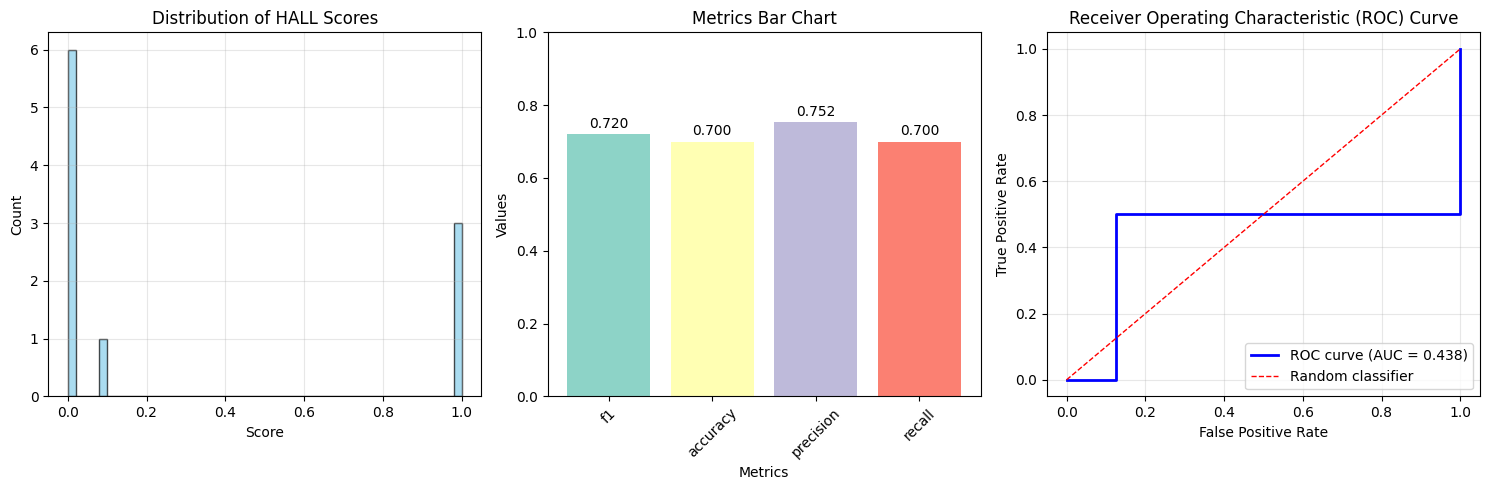

In [12]:
score_manager.combined_plots(
    plot_list=["score_distribution", "metrics_bar", "roc_curve"],
    save_path="plots/plots.pdf", figsize=(15, 5)
)

## Process all

### Scoring all runs

In [13]:
import os
import json
from datasets import load_from_disk
from mirage import ScoreManager
from tqdm import tqdm

# Define your root directory
root_dir = "results/true/"

# Define the list of metrics to compute
metric_list = [
    "data_stats", "f1", "precision", "recall", "accuracy",
    "balanced_accuracy", "mcc", "kappa", "log_loss",
    "auroc", "auprc", "roc_values", "confusion_matrix", "precision_recall_values"
]

# Prepare a container for results
all_results = {}

# Output path for plots
plots_root = "results/plots"

# Walk through each dataset (e.g., begin, fever, dialfact...)
for dataset_name in tqdm(os.listdir(root_dir)):
    dataset_path = os.path.join(root_dir, dataset_name)
    if not os.path.isdir(dataset_path):
        continue

    all_results[dataset_name] = {}

    # Each subfolder is a metric result (e.g., FEQA, FactAcc, etc.)
    for metric_dir in os.listdir(dataset_path):
        metric_path = os.path.join(dataset_path, metric_dir)
        if not os.path.isdir(metric_path):
            continue

        try:
            # Load the dataset
            dataset = load_from_disk(metric_path)

            # Invert prediction logic
            dataset = dataset.map(lambda row: {"predictions": {"HALL": row["score"], "NOHALL": 1 - row["score"]}})
            dataset = dataset.map(lambda row: {"label": "NOHALL" if row["label"] else "HALL"})

            # Score it
            score_manager = ScoreManager(dataset, metric_list=metric_list, on_split="test")

            # Save results
            all_results[dataset_name][metric_dir] = score_manager.results

            # Output directory for plots
            output_dir = os.path.join(plots_root, dataset_name, metric_dir)
            os.makedirs(output_dir, exist_ok=True)

            # Save plots
            score_manager.plot(
                plot_list=["score_distribution", "metrics_bar", "roc_curve", "precision_recall_curve", "confusion_matrix"],
                metrics_bar=["f1", "accuracy", "precision", "recall"],
                save_plots=True,
                save_format='pdf',
                output_path=output_dir,
                interactive=True
            )

            print(f"✅ Processed {dataset_name}/{metric_dir}")

        except Exception as e:
            print(f"❌ Failed to process {dataset_name}/{metric_dir}: {e}")

# Optionally, save results as JSON
os.makedirs("results", exist_ok=True)
with open("results/all_results.json", "w") as f:
    json.dump(all_results, f, indent=2, default=str)


  0%|          | 0/9 [00:00<?, ?it/s]

Plot saved: results/plots/qags_xsum/QAGS/score_distribution.pdf


Plot saved: results/plots/qags_xsum/QAGS/metrics_bar.pdf


Plot saved: results/plots/qags_xsum/QAGS/roc_curve.pdf


Plot saved: results/plots/qags_xsum/QAGS/precision_recall_curve.pdf


Plot saved: results/plots/qags_xsum/QAGS/confusion_matrix.pdf


✅ Processed qags_xsum/QAGS



Map: 100%|██████████| 1/1 [00:00<00:00, 425.99 examples/s]

Map: 100%|██████████| 1/1 [00:00<00:00, 461.93 examples/s]

Plot saved: results/plots/qags_xsum/FEQA/score_distribution.pdf



/home/benjamin/work/test/testing_mirage/MIRAGE/mirage_test3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning:

A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.

/home/benjamin/work/test/testing_mirage/MIRAGE/mirage_test3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning:

A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.

/home/benjamin/work/test/testing_mirage/MIRAGE/mirage_test3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning:

A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.

/home/benjamin/work/test/testing_mirage/MIRAGE/mirage_test3/lib/python3.12/site-packages/sklearn/me

Plot saved: results/plots/qags_xsum/FEQA/metrics_bar.pdf


Plot saved: results/plots/qags_xsum/FEQA/roc_curve.pdf


Plot saved: results/plots/qags_xsum/FEQA/precision_recall_curve.pdf


Plot saved: results/plots/qags_xsum/FEQA/confusion_matrix.pdf


✅ Processed qags_xsum/FEQA
Plot saved: results/plots/qags_xsum/FactCC/score_distribution.pdf


Plot saved: results/plots/qags_xsum/FactCC/metrics_bar.pdf


Plot saved: results/plots/qags_xsum/FactCC/roc_curve.pdf


Plot saved: results/plots/qags_xsum/FactCC/precision_recall_curve.pdf


Plot saved: results/plots/qags_xsum/FactCC/confusion_matrix.pdf


 11%|█         | 1/9 [00:01<00:09,  1.14s/it]

✅ Processed qags_xsum/FactCC
Plot saved: results/plots/fever/QAGS/score_distribution.pdf


Plot saved: results/plots/fever/QAGS/metrics_bar.pdf


Plot saved: results/plots/fever/QAGS/roc_curve.pdf


Plot saved: results/plots/fever/QAGS/precision_recall_curve.pdf


Plot saved: results/plots/fever/QAGS/confusion_matrix.pdf


✅ Processed fever/QAGS
Plot saved: results/plots/fever/FEQA/score_distribution.pdf


/home/benjamin/work/test/testing_mirage/MIRAGE/mirage_test3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Plot saved: results/plots/fever/FEQA/metrics_bar.pdf


Plot saved: results/plots/fever/FEQA/roc_curve.pdf


Plot saved: results/plots/fever/FEQA/precision_recall_curve.pdf


Plot saved: results/plots/fever/FEQA/confusion_matrix.pdf


✅ Processed fever/FEQA
Plot saved: results/plots/fever/FactCC/score_distribution.pdf


Plot saved: results/plots/fever/FactCC/metrics_bar.pdf


Plot saved: results/plots/fever/FactCC/roc_curve.pdf


Plot saved: results/plots/fever/FactCC/precision_recall_curve.pdf


Plot saved: results/plots/fever/FactCC/confusion_matrix.pdf


✅ Processed fever/FactCC



Map: 100%|██████████| 1/1 [00:00<00:00, 524.16 examples/s]

Map: 100%|██████████| 1/1 [00:00<00:00, 580.13 examples/s]

Plot saved: results/plots/fever/FactAcc/score_distribution.pdf



/home/benjamin/work/test/testing_mirage/MIRAGE/mirage_test3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/benjamin/work/test/testing_mirage/MIRAGE/mirage_test3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/home/benjamin/work/test/testing_mirage/MIRAGE/mirage_test3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:2776: UserWarning:

y_pred contains classes not in y_true

/home/benjamin/work/test/testing_mirage/MIRAGE/mirage_test3/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1192: UndefinedMetricWarning:

No negative samples in y_true, false positive value should be meaningless

/home/benja

Plot saved: results/plots/fever/FactAcc/metrics_bar.pdf


Plot saved: results/plots/fever/FactAcc/roc_curve.pdf


Plot saved: results/plots/fever/FactAcc/precision_recall_curve.pdf


Plot saved: results/plots/fever/FactAcc/confusion_matrix.pdf


 22%|██▏       | 2/9 [00:01<00:05,  1.29it/s]

✅ Processed fever/FactAcc
Plot saved: results/plots/dialfact/QAGS/score_distribution.pdf


Plot saved: results/plots/dialfact/QAGS/metrics_bar.pdf


Plot saved: results/plots/dialfact/QAGS/roc_curve.pdf


Plot saved: results/plots/dialfact/QAGS/precision_recall_curve.pdf


Plot saved: results/plots/dialfact/QAGS/confusion_matrix.pdf


✅ Processed dialfact/QAGS
Plot saved: results/plots/dialfact/FEQA/score_distribution.pdf


/home/benjamin/work/test/testing_mirage/MIRAGE/mirage_test3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Plot saved: results/plots/dialfact/FEQA/metrics_bar.pdf


Plot saved: results/plots/dialfact/FEQA/roc_curve.pdf


Plot saved: results/plots/dialfact/FEQA/precision_recall_curve.pdf


Plot saved: results/plots/dialfact/FEQA/confusion_matrix.pdf


✅ Processed dialfact/FEQA
Plot saved: results/plots/dialfact/FactCC/score_distribution.pdf


Plot saved: results/plots/dialfact/FactCC/metrics_bar.pdf


Plot saved: results/plots/dialfact/FactCC/roc_curve.pdf


Plot saved: results/plots/dialfact/FactCC/precision_recall_curve.pdf


Plot saved: results/plots/dialfact/FactCC/confusion_matrix.pdf


✅ Processed dialfact/FactCC



Map: 100%|██████████| 1/1 [00:00<00:00, 614.73 examples/s]

Map: 100%|██████████| 1/1 [00:00<00:00, 657.11 examples/s]

Plot saved: results/plots/dialfact/FactAcc/score_distribution.pdf



/home/benjamin/work/test/testing_mirage/MIRAGE/mirage_test3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning:

A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.

/home/benjamin/work/test/testing_mirage/MIRAGE/mirage_test3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning:

A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.

/home/benjamin/work/test/testing_mirage/MIRAGE/mirage_test3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning:

A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.

/home/benjamin/work/test/testing_mirage/MIRAGE/mirage_test3/lib/python3.12/site-packages/sklearn/me

Plot saved: results/plots/dialfact/FactAcc/metrics_bar.pdf


Plot saved: results/plots/dialfact/FactAcc/roc_curve.pdf


Plot saved: results/plots/dialfact/FactAcc/precision_recall_curve.pdf


Plot saved: results/plots/dialfact/FactAcc/confusion_matrix.pdf


 33%|███▎      | 3/9 [00:02<00:03,  1.52it/s]

✅ Processed dialfact/FactAcc
Plot saved: results/plots/qags_cnndm/QAGS/score_distribution.pdf


Plot saved: results/plots/qags_cnndm/QAGS/metrics_bar.pdf


Plot saved: results/plots/qags_cnndm/QAGS/roc_curve.pdf


Plot saved: results/plots/qags_cnndm/QAGS/precision_recall_curve.pdf


Plot saved: results/plots/qags_cnndm/QAGS/confusion_matrix.pdf


✅ Processed qags_cnndm/QAGS



Map: 100%|██████████| 1/1 [00:00<00:00, 474.47 examples/s]

Map: 100%|██████████| 1/1 [00:00<00:00, 485.96 examples/s]

Plot saved: results/plots/qags_cnndm/FEQA/score_distribution.pdf



/home/benjamin/work/test/testing_mirage/MIRAGE/mirage_test3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning:

A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.

/home/benjamin/work/test/testing_mirage/MIRAGE/mirage_test3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning:

A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.

/home/benjamin/work/test/testing_mirage/MIRAGE/mirage_test3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning:

A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.

/home/benjamin/work/test/testing_mirage/MIRAGE/mirage_test3/lib/python3.12/site-packages/sklearn/me

Plot saved: results/plots/qags_cnndm/FEQA/metrics_bar.pdf


Plot saved: results/plots/qags_cnndm/FEQA/roc_curve.pdf


Plot saved: results/plots/qags_cnndm/FEQA/precision_recall_curve.pdf


Plot saved: results/plots/qags_cnndm/FEQA/confusion_matrix.pdf


✅ Processed qags_cnndm/FEQA
Plot saved: results/plots/qags_cnndm/FactCC/score_distribution.pdf


Plot saved: results/plots/qags_cnndm/FactCC/metrics_bar.pdf


Plot saved: results/plots/qags_cnndm/FactCC/roc_curve.pdf


Plot saved: results/plots/qags_cnndm/FactCC/precision_recall_curve.pdf


Plot saved: results/plots/qags_cnndm/FactCC/confusion_matrix.pdf


✅ Processed qags_cnndm/FactCC



Map: 100%|██████████| 1/1 [00:00<00:00, 617.63 examples/s]

Map: 100%|██████████| 1/1 [00:00<00:00, 662.19 examples/s]

Plot saved: results/plots/qags_cnndm/FactAcc/score_distribution.pdf



/home/benjamin/work/test/testing_mirage/MIRAGE/mirage_test3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning:

A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.

/home/benjamin/work/test/testing_mirage/MIRAGE/mirage_test3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning:

A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.

/home/benjamin/work/test/testing_mirage/MIRAGE/mirage_test3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning:

A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.

/home/benjamin/work/test/testing_mirage/MIRAGE/mirage_test3/lib/python3.12/site-packages/sklearn/me

Plot saved: results/plots/qags_cnndm/FactAcc/metrics_bar.pdf


Plot saved: results/plots/qags_cnndm/FactAcc/roc_curve.pdf


Plot saved: results/plots/qags_cnndm/FactAcc/precision_recall_curve.pdf


Plot saved: results/plots/qags_cnndm/FactAcc/confusion_matrix.pdf


 44%|████▍     | 4/9 [00:02<00:02,  1.69it/s]

✅ Processed qags_cnndm/FactAcc
Plot saved: results/plots/summeval/QAGS/score_distribution.pdf


/home/benjamin/work/test/testing_mirage/MIRAGE/mirage_test3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Plot saved: results/plots/summeval/QAGS/metrics_bar.pdf


Plot saved: results/plots/summeval/QAGS/roc_curve.pdf


Plot saved: results/plots/summeval/QAGS/precision_recall_curve.pdf


Plot saved: results/plots/summeval/QAGS/confusion_matrix.pdf


✅ Processed summeval/QAGS



Map: 100%|██████████| 1/1 [00:00<00:00, 477.33 examples/s]

Map: 100%|██████████| 1/1 [00:00<00:00, 475.54 examples/s]

Plot saved: results/plots/summeval/FEQA/score_distribution.pdf



/home/benjamin/work/test/testing_mirage/MIRAGE/mirage_test3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/benjamin/work/test/testing_mirage/MIRAGE/mirage_test3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/home/benjamin/work/test/testing_mirage/MIRAGE/mirage_test3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:2776: UserWarning:

y_pred contains classes not in y_true

/home/benjamin/work/test/testing_mirage/MIRAGE/mirage_test3/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1192: UndefinedMetricWarning:

No negative samples in y_true, false positive value should be meaningless

/home/benja

Plot saved: results/plots/summeval/FEQA/metrics_bar.pdf


Plot saved: results/plots/summeval/FEQA/roc_curve.pdf


Plot saved: results/plots/summeval/FEQA/precision_recall_curve.pdf


Plot saved: results/plots/summeval/FEQA/confusion_matrix.pdf


✅ Processed summeval/FEQA
Plot saved: results/plots/summeval/FactCC/score_distribution.pdf


Plot saved: results/plots/summeval/FactCC/metrics_bar.pdf


Plot saved: results/plots/summeval/FactCC/roc_curve.pdf


Plot saved: results/plots/summeval/FactCC/precision_recall_curve.pdf


Plot saved: results/plots/summeval/FactCC/confusion_matrix.pdf


✅ Processed summeval/FactCC



Map: 100%|██████████| 1/1 [00:00<00:00, 588.18 examples/s]

Map: 100%|██████████| 1/1 [00:00<00:00, 633.10 examples/s]

Plot saved: results/plots/summeval/FactAcc/score_distribution.pdf



/home/benjamin/work/test/testing_mirage/MIRAGE/mirage_test3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/benjamin/work/test/testing_mirage/MIRAGE/mirage_test3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/home/benjamin/work/test/testing_mirage/MIRAGE/mirage_test3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:2776: UserWarning:

y_pred contains classes not in y_true

/home/benjamin/work/test/testing_mirage/MIRAGE/mirage_test3/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1192: UndefinedMetricWarning:

No negative samples in y_true, false positive value should be meaningless

/home/benja

Plot saved: results/plots/summeval/FactAcc/metrics_bar.pdf


Plot saved: results/plots/summeval/FactAcc/roc_curve.pdf


Plot saved: results/plots/summeval/FactAcc/precision_recall_curve.pdf


Plot saved: results/plots/summeval/FactAcc/confusion_matrix.pdf


 56%|█████▌    | 5/9 [00:03<00:02,  1.78it/s]

✅ Processed summeval/FactAcc
Plot saved: results/plots/begin/QAGS/score_distribution.pdf


Plot saved: results/plots/begin/QAGS/metrics_bar.pdf


Plot saved: results/plots/begin/QAGS/roc_curve.pdf


Plot saved: results/plots/begin/QAGS/precision_recall_curve.pdf


Plot saved: results/plots/begin/QAGS/confusion_matrix.pdf


✅ Processed begin/QAGS
Plot saved: results/plots/begin/FEQA/score_distribution.pdf


Plot saved: results/plots/begin/FEQA/metrics_bar.pdf


Plot saved: results/plots/begin/FEQA/roc_curve.pdf


Plot saved: results/plots/begin/FEQA/precision_recall_curve.pdf


Plot saved: results/plots/begin/FEQA/confusion_matrix.pdf


✅ Processed begin/FEQA
Plot saved: results/plots/begin/FactCC/score_distribution.pdf


Plot saved: results/plots/begin/FactCC/metrics_bar.pdf


Plot saved: results/plots/begin/FactCC/roc_curve.pdf


Plot saved: results/plots/begin/FactCC/precision_recall_curve.pdf


Plot saved: results/plots/begin/FactCC/confusion_matrix.pdf


✅ Processed begin/FactCC
Plot saved: results/plots/begin/FactAcc/score_distribution.pdf


Plot saved: results/plots/begin/FactAcc/metrics_bar.pdf


Plot saved: results/plots/begin/FactAcc/roc_curve.pdf


Plot saved: results/plots/begin/FactAcc/precision_recall_curve.pdf


Plot saved: results/plots/begin/FactAcc/confusion_matrix.pdf


 67%|██████▋   | 6/9 [00:03<00:01,  1.85it/s]

✅ Processed begin/FactAcc
Plot saved: results/plots/mnbm/QAGS/score_distribution.pdf


/home/benjamin/work/test/testing_mirage/MIRAGE/mirage_test3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Plot saved: results/plots/mnbm/QAGS/metrics_bar.pdf


Plot saved: results/plots/mnbm/QAGS/roc_curve.pdf


Plot saved: results/plots/mnbm/QAGS/precision_recall_curve.pdf


Plot saved: results/plots/mnbm/QAGS/confusion_matrix.pdf


✅ Processed mnbm/QAGS
Plot saved: results/plots/mnbm/FEQA/score_distribution.pdf


/home/benjamin/work/test/testing_mirage/MIRAGE/mirage_test3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Plot saved: results/plots/mnbm/FEQA/metrics_bar.pdf


Plot saved: results/plots/mnbm/FEQA/roc_curve.pdf


Plot saved: results/plots/mnbm/FEQA/precision_recall_curve.pdf


Plot saved: results/plots/mnbm/FEQA/confusion_matrix.pdf


✅ Processed mnbm/FEQA
Plot saved: results/plots/mnbm/FactCC/score_distribution.pdf


Plot saved: results/plots/mnbm/FactCC/metrics_bar.pdf


Plot saved: results/plots/mnbm/FactCC/roc_curve.pdf


Plot saved: results/plots/mnbm/FactCC/precision_recall_curve.pdf


Plot saved: results/plots/mnbm/FactCC/confusion_matrix.pdf


✅ Processed mnbm/FactCC



Map: 100%|██████████| 1/1 [00:00<00:00, 549.93 examples/s]

Map: 100%|██████████| 1/1 [00:00<00:00, 578.76 examples/s]

Plot saved: results/plots/mnbm/FactAcc/score_distribution.pdf



/home/benjamin/work/test/testing_mirage/MIRAGE/mirage_test3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/benjamin/work/test/testing_mirage/MIRAGE/mirage_test3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/home/benjamin/work/test/testing_mirage/MIRAGE/mirage_test3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:2776: UserWarning:

y_pred contains classes not in y_true

/home/benjamin/work/test/testing_mirage/MIRAGE/mirage_test3/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1192: UndefinedMetricWarning:

No negative samples in y_true, false positive value should be meaningless

/home/benja

Plot saved: results/plots/mnbm/FactAcc/metrics_bar.pdf


Plot saved: results/plots/mnbm/FactAcc/roc_curve.pdf


Plot saved: results/plots/mnbm/FactAcc/precision_recall_curve.pdf


Plot saved: results/plots/mnbm/FactAcc/confusion_matrix.pdf


 78%|███████▊  | 7/9 [00:04<00:01,  1.88it/s]

✅ Processed mnbm/FactAcc
Plot saved: results/plots/vitc/QAGS/score_distribution.pdf


Plot saved: results/plots/vitc/QAGS/metrics_bar.pdf


Plot saved: results/plots/vitc/QAGS/roc_curve.pdf


Plot saved: results/plots/vitc/QAGS/precision_recall_curve.pdf


Plot saved: results/plots/vitc/QAGS/confusion_matrix.pdf


✅ Processed vitc/QAGS



Map: 100%|██████████| 1/1 [00:00<00:00, 463.82 examples/s]

Map: 100%|██████████| 1/1 [00:00<00:00, 513.44 examples/s]

Plot saved: results/plots/vitc/FEQA/score_distribution.pdf



/home/benjamin/work/test/testing_mirage/MIRAGE/mirage_test3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/benjamin/work/test/testing_mirage/MIRAGE/mirage_test3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/home/benjamin/work/test/testing_mirage/MIRAGE/mirage_test3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:2776: UserWarning:

y_pred contains classes not in y_true

/home/benjamin/work/test/testing_mirage/MIRAGE/mirage_test3/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1192: UndefinedMetricWarning:

No negative samples in y_true, false positive value should be meaningless

/home/benja

Plot saved: results/plots/vitc/FEQA/metrics_bar.pdf


Plot saved: results/plots/vitc/FEQA/roc_curve.pdf


Plot saved: results/plots/vitc/FEQA/precision_recall_curve.pdf


Plot saved: results/plots/vitc/FEQA/confusion_matrix.pdf


✅ Processed vitc/FEQA
Plot saved: results/plots/vitc/FactCC/score_distribution.pdf


Plot saved: results/plots/vitc/FactCC/metrics_bar.pdf


Plot saved: results/plots/vitc/FactCC/roc_curve.pdf


Plot saved: results/plots/vitc/FactCC/precision_recall_curve.pdf


Plot saved: results/plots/vitc/FactCC/confusion_matrix.pdf


✅ Processed vitc/FactCC



Map: 100%|██████████| 1/1 [00:00<00:00, 593.59 examples/s]

Map: 100%|██████████| 1/1 [00:00<00:00, 638.31 examples/s]

Plot saved: results/plots/vitc/FactAcc/score_distribution.pdf



/home/benjamin/work/test/testing_mirage/MIRAGE/mirage_test3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/benjamin/work/test/testing_mirage/MIRAGE/mirage_test3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/home/benjamin/work/test/testing_mirage/MIRAGE/mirage_test3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:2776: UserWarning:

y_pred contains classes not in y_true

/home/benjamin/work/test/testing_mirage/MIRAGE/mirage_test3/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1192: UndefinedMetricWarning:

No negative samples in y_true, false positive value should be meaningless

/home/benja

Plot saved: results/plots/vitc/FactAcc/metrics_bar.pdf


Plot saved: results/plots/vitc/FactAcc/roc_curve.pdf


Plot saved: results/plots/vitc/FactAcc/precision_recall_curve.pdf


Plot saved: results/plots/vitc/FactAcc/confusion_matrix.pdf


 89%|████████▉ | 8/9 [00:04<00:00,  1.92it/s]

✅ Processed vitc/FactAcc
Plot saved: results/plots/q2/QAGS/score_distribution.pdf


Plot saved: results/plots/q2/QAGS/metrics_bar.pdf


Plot saved: results/plots/q2/QAGS/roc_curve.pdf


Plot saved: results/plots/q2/QAGS/precision_recall_curve.pdf


Plot saved: results/plots/q2/QAGS/confusion_matrix.pdf


✅ Processed q2/QAGS
Plot saved: results/plots/q2/FEQA/score_distribution.pdf


Plot saved: results/plots/q2/FEQA/metrics_bar.pdf


Plot saved: results/plots/q2/FEQA/roc_curve.pdf


Plot saved: results/plots/q2/FEQA/precision_recall_curve.pdf


Plot saved: results/plots/q2/FEQA/confusion_matrix.pdf


✅ Processed q2/FEQA
Plot saved: results/plots/q2/FactCC/score_distribution.pdf


Plot saved: results/plots/q2/FactCC/metrics_bar.pdf


Plot saved: results/plots/q2/FactCC/roc_curve.pdf


Plot saved: results/plots/q2/FactCC/precision_recall_curve.pdf


Plot saved: results/plots/q2/FactCC/confusion_matrix.pdf


✅ Processed q2/FactCC



Map: 100%|██████████| 1/1 [00:00<00:00, 581.01 examples/s]

Map: 100%|██████████| 1/1 [00:00<00:00, 615.09 examples/s]

Plot saved: results/plots/q2/FactAcc/score_distribution.pdf



/home/benjamin/work/test/testing_mirage/MIRAGE/mirage_test3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/benjamin/work/test/testing_mirage/MIRAGE/mirage_test3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/home/benjamin/work/test/testing_mirage/MIRAGE/mirage_test3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:2776: UserWarning:

y_pred contains classes not in y_true

/home/benjamin/work/test/testing_mirage/MIRAGE/mirage_test3/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1192: UndefinedMetricWarning:

No negative samples in y_true, false positive value should be meaningless

/home/benja

Plot saved: results/plots/q2/FactAcc/metrics_bar.pdf


Plot saved: results/plots/q2/FactAcc/roc_curve.pdf


Plot saved: results/plots/q2/FactAcc/precision_recall_curve.pdf


Plot saved: results/plots/q2/FactAcc/confusion_matrix.pdf


100%|██████████| 9/9 [00:05<00:00,  1.69it/s]

✅ Processed q2/FactAcc


### Merging all results

In [14]:
import json
import pandas as pd

# Load the results
with open("results/all_results.json", "r") as f:
    results = json.load(f)

# Let's process the structure into a flat dictionary first
flat_data = {}

# Loop through outer keys like 'qags_xsum'
for dataset_key, dataset_val in results.items():
    for model_key, model_val in dataset_val.items():
        metrics = model_val.copy()
        # Remove nested dicts like data_stats, roc_values, etc.
        for subkey in ['data_stats', 'roc_values', 'confusion_matrix', 'precision_recall_values']:
            metrics.pop(subkey, None)
        # Create label for the column
        col_label = f"{dataset_key}/{model_key}"
        flat_data[col_label] = metrics

# Convert to DataFrame
df = pd.DataFrame(flat_data)

# Display the DataFrame
df


,qags_xsum/QAGS,qags_xsum/FEQA,qags_xsum/FactCC,fever/QAGS,fever/FEQA,fever/FactCC,fever/FactAcc,dialfact/QAGS,dialfact/FEQA,dialfact/FactCC,...,mnbm/FactCC,mnbm/FactAcc,vitc/QAGS,vitc/FEQA,vitc/FactCC,vitc/FactAcc,q2/QAGS,q2/FEQA,q2/FactCC,q2/FactAcc
f1,0.285714,1.00000,0.800000,0.457143,0.066667,0.729670,0.000000,0.680000,0.576471,0.425000,...,0.638095,0.000000,0.264646,0.000000,0.515152,0.000000,0.321212,0.100000,0.200000,0.000000
precision,0.222222,1.00000,0.800000,0.533333,0.040000,0.880000,0.000000,0.675000,0.490000,0.480000,...,0.716667,0.000000,0.425000,0.000000,0.625000,0.000000,0.400000,0.066667,0.276190,0.000000
recall,0.400000,1.00000,0.800000,0.400000,0.200000,0.700000,0.000000,0.700000,0.700000,0.400000,...,0.600000,0.000000,0.300000,0.000000,0.500000,0.000000,0.300000,0.200000,0.200000,0.000000
accuracy,0.400000,1.00000,0.800000,0.400000,0.200000,0.700000,0.000000,0.700000,0.700000,0.400000,...,0.600000,0.000000,0.300000,0.000000,0.500000,0.000000,0.300000,0.200000,0.200000,0.000000
balanced_accuracy,0.400000,1.00000,0.800000,0.250000,0.500000,0.812500,0.000000,0.595238,0.500000,0.380952,...,0.562500,0.000000,0.404762,0.000000,0.547619,0.000000,0.309524,0.333333,0.238095,0.000000
mcc,-0.333333,0.00000,0.600000,-0.408248,0.000000,0.500000,0.000000,0.218218,0.000000,-0.218218,...,0.102062,0.000000,-0.218218,0.000000,0.089087,0.000000,-0.356348,-0.509175,-0.523810,0.000000
kappa,-0.200000,NaN,0.600000,-0.363636,0.000000,0.400000,0.000000,0.210526,0.000000,-0.200000,...,0.090909,0.000000,-0.129032,0.000000,0.074074,0.000000,-0.296296,-0.212121,-0.379310,0.000000
log_loss,18.208081,0.13933,0.946194,14.905520,1.316135,1.090948,36.043653,4.176846,1.031351,1.967325,...,1.549671,36.043653,11.438908,4.130712,2.391683,36.043653,4.460371,1.745647,3.881209,36.043653
auroc,0.280000,NaN,0.840000,0.062500,0.562500,0.812500,NaN,0.404762,0.142857,0.333333,...,0.562500,NaN,0.476190,NaN,0.476190,NaN,0.238095,0.142857,0.380952,NaN
auprc,0.333333,0.50000,0.874643,0.654911,0.807490,0.956870,1.000000,0.490476,0.186508,0.218254,...,0.887698,1.000000,0.721429,1.000000,0.623073,1.000000,0.663265,0.512925,0.576644,1.000000


In [15]:
import pandas as pd

def display_metric_tables_by_dataset(results_dict):
    skip_metrics = {'confusion_matrix', 'precision_recall_values', 'roc_values', 'data_stats'}
    datasets = list(results_dict.keys())

    # Collect all methods and metrics
    methods = set()
    metrics = set()

    for ds, method_dict in results_dict.items():
        for method, metric_dict in method_dict.items():
            if method == "data_stats":
                continue
            methods.add(method)
            metrics.update(m for m in metric_dict if m not in skip_metrics)

    methods = sorted(methods)
    metrics = sorted(metrics)

    for metric in metrics:
        data_rows = []
        for ds in datasets:
            ds_entry = results_dict[ds]
            
            stats = ds_entry["QAGS"]["data_stats"]
            
            row = {
                "pos_count": stats.get("pos_count"),
                "neg_count": stats.get("neg_count"),
                "pos_ratio": round(stats.get("pos_ratio", 0), 4),
                "neg_ratio": round(stats.get("neg_ratio", 0), 4),
            }
            for method in methods:
                val = ds_entry.get(method, {}).get(metric, None)
                row[method] = round(val, 4) if isinstance(val, float) else val
            data_rows.append(row)

        df = pd.DataFrame(data_rows)
        df.insert(0, "Dataset", datasets)
        print(f"\n=== {metric.upper()} TABLE ===")
        display(df)


In [16]:
display_metric_tables_by_dataset(results)


=== ACCURACY TABLE ===


,Dataset,pos_count,neg_count,pos_ratio,neg_ratio,FEQA,FactAcc,FactCC,QAGS
0,qags_xsum,5,5,0.5,0.5,1.0,NaN,0.8,0.4
1,fever,8,2,0.8,0.2,0.2,0.0,0.7,0.4
2,dialfact,3,7,0.3,0.7,0.7,1.0,0.4,0.7
3,qags_cnndm,3,7,0.3,0.7,1.0,1.0,0.8,0.2
4,summeval,2,8,0.2,0.8,0.0,0.0,0.7,0.8
5,begin,4,6,0.4,0.6,0.4,0.5,0.7,0.1
6,mnbm,8,2,0.8,0.2,0.2,0.0,0.6,0.2
7,vitc,7,3,0.7,0.3,0.0,0.0,0.5,0.3
8,q2,7,3,0.7,0.3,0.2,0.0,0.2,0.3



=== AUPRC TABLE ===


,Dataset,pos_count,neg_count,pos_ratio,neg_ratio,FEQA,FactAcc,FactCC,QAGS
0,qags_xsum,5,5,0.5,0.5,0.5000,NaN,0.8746,0.3333
1,fever,8,2,0.8,0.2,0.8075,1.0,0.9569,0.6549
2,dialfact,3,7,0.3,0.7,0.1865,0.5,0.2183,0.4905
3,qags_cnndm,3,7,0.3,0.7,0.5000,0.5,0.4611,0.1902
4,summeval,2,8,0.2,0.8,1.0000,1.0,0.2028,0.6429
5,begin,4,6,0.4,0.6,0.2533,0.2,0.7932,0.2333
6,mnbm,8,2,0.8,0.2,0.7896,1.0,0.8877,0.8719
7,vitc,7,3,0.7,0.3,1.0000,1.0,0.6231,0.7214
8,q2,7,3,0.7,0.3,0.5129,1.0,0.5766,0.6633



=== AUROC TABLE ===


,Dataset,pos_count,neg_count,pos_ratio,neg_ratio,FEQA,FactAcc,FactCC,QAGS
0,qags_xsum,5,5,0.5,0.5,NaN,NaN,0.8400,0.2800
1,fever,8,2,0.8,0.2,0.5625,NaN,0.8125,0.0625
2,dialfact,3,7,0.3,0.7,0.1429,NaN,0.3333,0.4048
3,qags_cnndm,3,7,0.3,0.7,NaN,NaN,0.8095,0.1905
4,summeval,2,8,0.2,0.8,NaN,NaN,0.4375,0.6875
5,begin,4,6,0.4,0.6,0.1667,0.4167,0.7917,0.1042
6,mnbm,8,2,0.8,0.2,0.3125,NaN,0.5625,0.5625
7,vitc,7,3,0.7,0.3,NaN,NaN,0.4762,0.4762
8,q2,7,3,0.7,0.3,0.1429,NaN,0.3810,0.2381



=== BALANCED_ACCURACY TABLE ===


,Dataset,pos_count,neg_count,pos_ratio,neg_ratio,FEQA,FactAcc,FactCC,QAGS
0,qags_xsum,5,5,0.5,0.5,1.0000,NaN,0.8000,0.4000
1,fever,8,2,0.8,0.2,0.5000,0.0000,0.8125,0.2500
2,dialfact,3,7,0.3,0.7,0.5000,1.0000,0.3810,0.5952
3,qags_cnndm,3,7,0.3,0.7,1.0000,1.0000,0.8571,0.1429
4,summeval,2,8,0.2,0.8,0.0000,0.0000,0.6250,0.5000
5,begin,4,6,0.4,0.6,0.3750,0.4167,0.6250,0.0833
6,mnbm,8,2,0.8,0.2,0.5000,0.0000,0.5625,0.5000
7,vitc,7,3,0.7,0.3,0.0000,0.0000,0.5476,0.4048
8,q2,7,3,0.7,0.3,0.3333,0.0000,0.2381,0.3095



=== F1 TABLE ===


,Dataset,pos_count,neg_count,pos_ratio,neg_ratio,FEQA,FactAcc,FactCC,QAGS
0,qags_xsum,5,5,0.5,0.5,1.0000,NaN,0.8000,0.2857
1,fever,8,2,0.8,0.2,0.0667,0.0,0.7297,0.4571
2,dialfact,3,7,0.3,0.7,0.5765,1.0,0.4250,0.6800
3,qags_cnndm,3,7,0.3,0.7,1.0000,1.0,0.8083,0.2333
4,summeval,2,8,0.2,0.8,0.0000,0.0,0.7200,0.7111
5,begin,4,6,0.4,0.6,0.4000,0.4,0.6400,0.1091
6,mnbm,8,2,0.8,0.2,0.0667,0.0,0.6381,0.0667
7,vitc,7,3,0.7,0.3,0.0000,0.0,0.5152,0.2646
8,q2,7,3,0.7,0.3,0.1000,0.0,0.2000,0.3212



=== KAPPA TABLE ===


,Dataset,pos_count,neg_count,pos_ratio,neg_ratio,FEQA,FactAcc,FactCC,QAGS
0,qags_xsum,5,5,0.5,0.5,NaN,NaN,0.6000,-0.2000
1,fever,8,2,0.8,0.2,0.0000,0.0000,0.4000,-0.3636
2,dialfact,3,7,0.3,0.7,0.0000,NaN,-0.2000,0.2105
3,qags_cnndm,3,7,0.3,0.7,NaN,NaN,0.6000,-0.6000
4,summeval,2,8,0.2,0.8,0.0000,0.0000,0.2105,0.0000
5,begin,4,6,0.4,0.6,-0.2500,-0.1905,0.2857,-0.8000
6,mnbm,8,2,0.8,0.2,0.0000,0.0000,0.0909,0.0000
7,vitc,7,3,0.7,0.3,0.0000,0.0000,0.0741,-0.1290
8,q2,7,3,0.7,0.3,-0.2121,0.0000,-0.3793,-0.2963



=== LOG_LOSS TABLE ===


,Dataset,pos_count,neg_count,pos_ratio,neg_ratio,FEQA,FactAcc,FactCC,QAGS
0,qags_xsum,5,5,0.5,0.5,0.1393,NaN,0.9462,18.2081
1,fever,8,2,0.8,0.2,1.3161,36.0437,1.0909,14.9055
2,dialfact,3,7,0.3,0.7,1.0314,0.0000,1.9673,4.1768
3,qags_cnndm,3,7,0.3,0.7,0.2185,0.0000,1.2576,7.8063
4,summeval,2,8,0.2,0.8,2.3622,36.0437,2.9271,0.4535
5,begin,4,6,0.4,0.6,11.6451,18.0218,1.5739,25.7068
6,mnbm,8,2,0.8,0.2,2.1036,36.0437,1.5497,15.4569
7,vitc,7,3,0.7,0.3,4.1307,36.0437,2.3917,11.4389
8,q2,7,3,0.7,0.3,1.7456,36.0437,3.8812,4.4604



=== MCC TABLE ===


,Dataset,pos_count,neg_count,pos_ratio,neg_ratio,FEQA,FactAcc,FactCC,QAGS
0,qags_xsum,5,5,0.5,0.5,0.0000,NaN,0.6000,-0.3333
1,fever,8,2,0.8,0.2,0.0000,0.0000,0.5000,-0.4082
2,dialfact,3,7,0.3,0.7,0.0000,0.0000,-0.2182,0.2182
3,qags_cnndm,3,7,0.3,0.7,0.0000,0.0000,0.6547,-0.6547
4,summeval,2,8,0.2,0.8,0.0000,0.0000,0.2182,0.0000
5,begin,4,6,0.4,0.6,-0.2500,-0.2722,0.4082,-0.8165
6,mnbm,8,2,0.8,0.2,0.0000,0.0000,0.1021,0.0000
7,vitc,7,3,0.7,0.3,0.0000,0.0000,0.0891,-0.2182
8,q2,7,3,0.7,0.3,-0.5092,0.0000,-0.5238,-0.3563



=== PRECISION TABLE ===


,Dataset,pos_count,neg_count,pos_ratio,neg_ratio,FEQA,FactAcc,FactCC,QAGS
0,qags_xsum,5,5,0.5,0.5,1.0000,NaN,0.8000,0.2222
1,fever,8,2,0.8,0.2,0.0400,0.0000,0.8800,0.5333
2,dialfact,3,7,0.3,0.7,0.4900,1.0000,0.4800,0.6750
3,qags_cnndm,3,7,0.3,0.7,1.0000,1.0000,0.8800,0.2800
4,summeval,2,8,0.2,0.8,0.0000,0.0000,0.7524,0.6400
5,begin,4,6,0.4,0.6,0.4000,0.3333,0.8000,0.1200
6,mnbm,8,2,0.8,0.2,0.0400,0.0000,0.7167,0.0400
7,vitc,7,3,0.7,0.3,0.0000,0.0000,0.6250,0.4250
8,q2,7,3,0.7,0.3,0.0667,0.0000,0.2762,0.4000



=== RECALL TABLE ===


,Dataset,pos_count,neg_count,pos_ratio,neg_ratio,FEQA,FactAcc,FactCC,QAGS
0,qags_xsum,5,5,0.5,0.5,1.0,NaN,0.8,0.4
1,fever,8,2,0.8,0.2,0.2,0.0,0.7,0.4
2,dialfact,3,7,0.3,0.7,0.7,1.0,0.4,0.7
3,qags_cnndm,3,7,0.3,0.7,1.0,1.0,0.8,0.2
4,summeval,2,8,0.2,0.8,0.0,0.0,0.7,0.8
5,begin,4,6,0.4,0.6,0.4,0.5,0.7,0.1
6,mnbm,8,2,0.8,0.2,0.2,0.0,0.6,0.2
7,vitc,7,3,0.7,0.3,0.0,0.0,0.5,0.3
8,q2,7,3,0.7,0.3,0.2,0.0,0.2,0.3
